In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import plotly.express as px
from bokeh.plotting import figure,show,output_notebook
from bokeh.models import HoverTool
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D


In [32]:
!pip install kaggle

from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset -p /content


!unzip -q /content/heart-attack-analysis-prediction-dataset.zip -d /content/original_dataset

os.listdir('/content/original_dataset')

csv_file_path = '/content/original_dataset/heart.csv'
df = pd.read_csv(csv_file_path)

df.head()


Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
License(s): CC0-1.0
heart-attack-analysis-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
replace /content/original_dataset/heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/original_dataset/o2Saturation.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# df= pd.read_csv('/content/heart.csv')

In [25]:
df.sample(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2,1
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
253,67,1,0,100,299,0,0,125,1,0.9,1,2,2,0


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [27]:
df.nunique()

,0
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [28]:
 pd.concat((df.nunique(),df.dtypes),axis=1)

,0,1
age,41,int64
sex,2,int64
cp,4,int64
trtbps,49,int64
chol,152,int64
fbs,2,int64
restecg,3,int64
thalachh,91,int64
exng,2,int64
oldpeak,40,float64


## Null handling

In [29]:
df.isnull().sum().sum()

0

In [ ]:
#df.fillna(method='ffill',inplace=True)

In [ ]:
#df.isnull().sum().sum()

0

## Remove duplicates

In [30]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.rename(columns={'output': 'target'}, inplace=True)
y = df['target']
X = df.drop(['target'], axis=1)
#df = pd.concat([X, y], axis=1)
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(302, 14)

##Data Viz

### Line chart

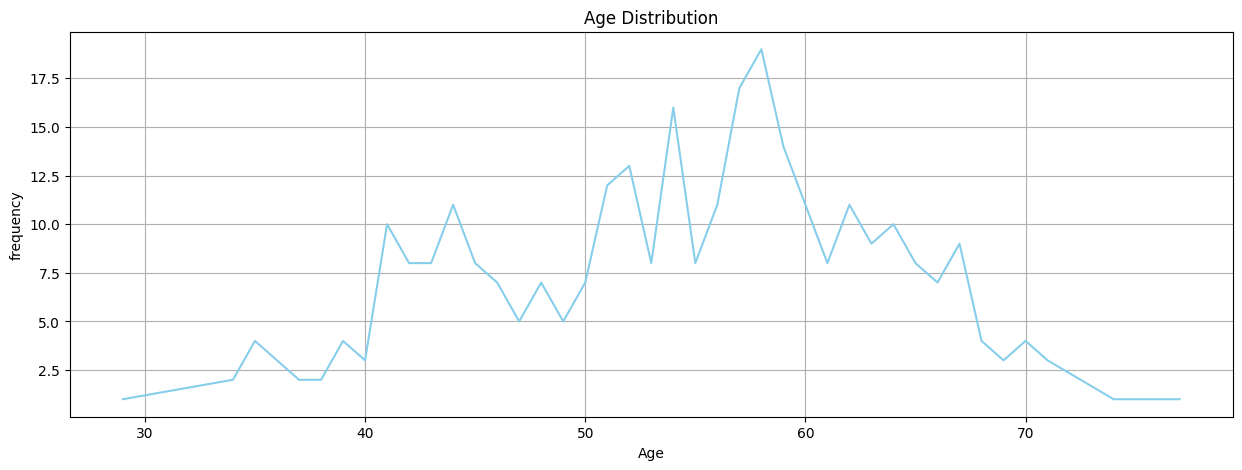

In [ ]:
# line chart for "age"
# pandas plot
age_count = df['age'].value_counts().sort_index()
age_count.plot(
    kind='line',
    figsize=(15,5),
    grid=True,
    color='skyblue',
    )
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.show()


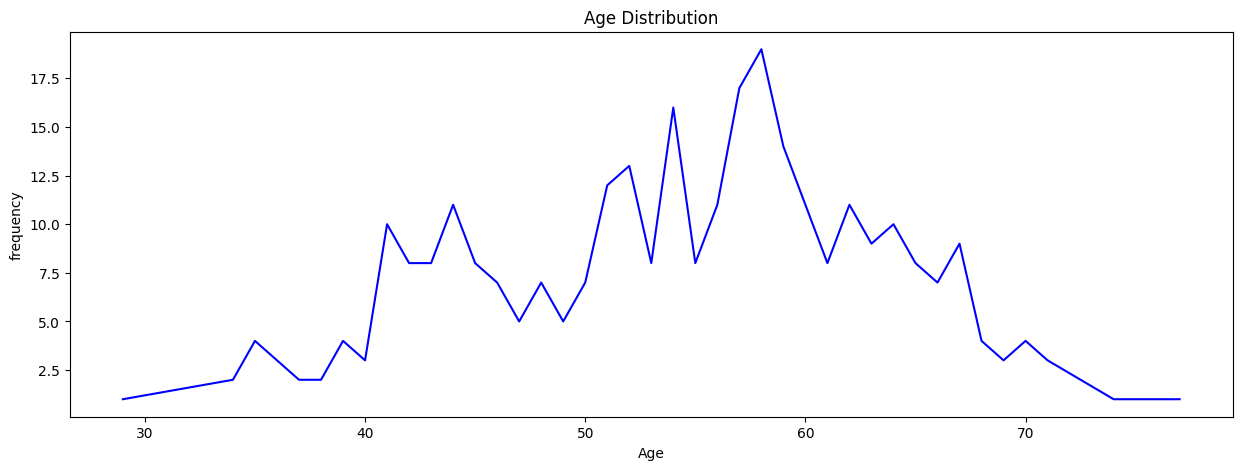

In [ ]:
# age dist --> plt
plt.figure(figsize=(15,5))
plt.plot(
    age_count,
     c='b',
    )
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.show()


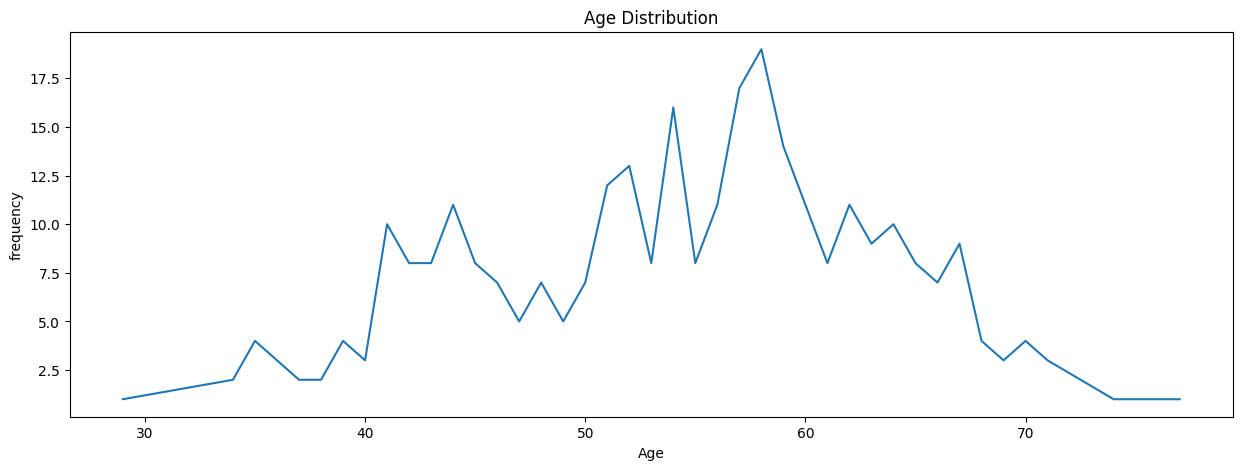

In [ ]:
## age dist --> seaborn

plt.figure(figsize=(15,5))
sns.lineplot(
    x=age_count.index,
    y=age_count.values,
    data=pd.DataFrame(age_count),
    )

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.show()


In [ ]:
## age dist --> plotly
fig = px.line(
    age_count,
    x=age_count.index,
    y = age_count.values,
    markers=True,
    title='Age Distribution',
    )
fig.update_layout(
    title="Age Distribution",
    xaxis_title="Age",
    yaxis_title="Frequency",
    )
fig.update_traces(
    hoverinfo='all',
    hovertemplate='<b>Age: </b>%{x} <br><i><b>Frequency:<b></i>%{y}',
    )
fig.show()


In [ ]:
#bokeh
output_notebook()
fig = figure(
    title=" Age Distribution",
    x_axis_label="frequency",
    width=800,
    height=400,
    )
fig.line(
    x=age_count.index,
    y=age_count.values,
    line_width=3,
    )
hover=HoverTool()
hover.tooltips=[("Age","@x"),("Frequency","@y")]
fig.add_tools(hover)
show(fig)


###Bar Chart

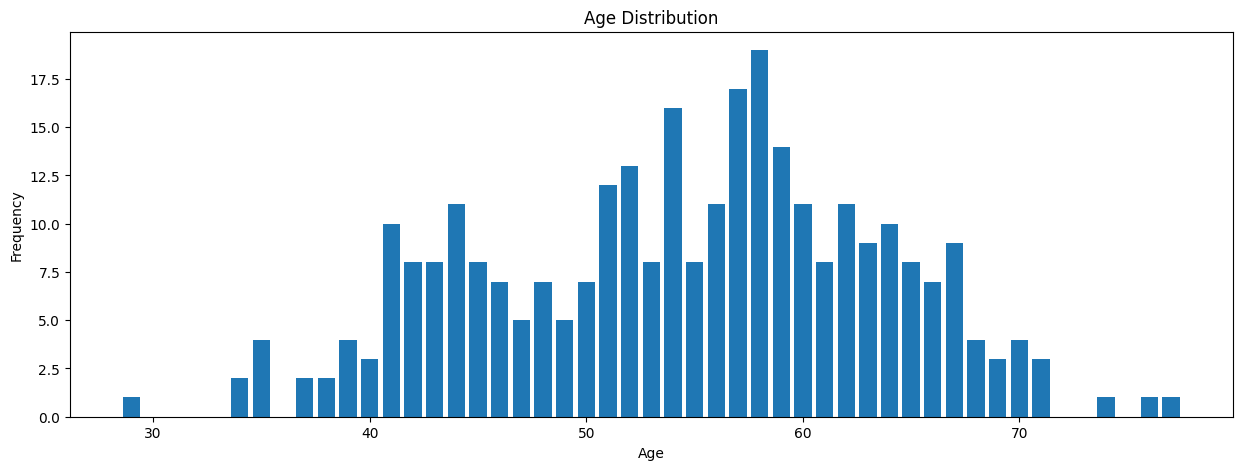

In [ ]:
#age dist. bar chart
plt.figure(figsize=(15,5))
plt.bar(age_count.index,age_count.values)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


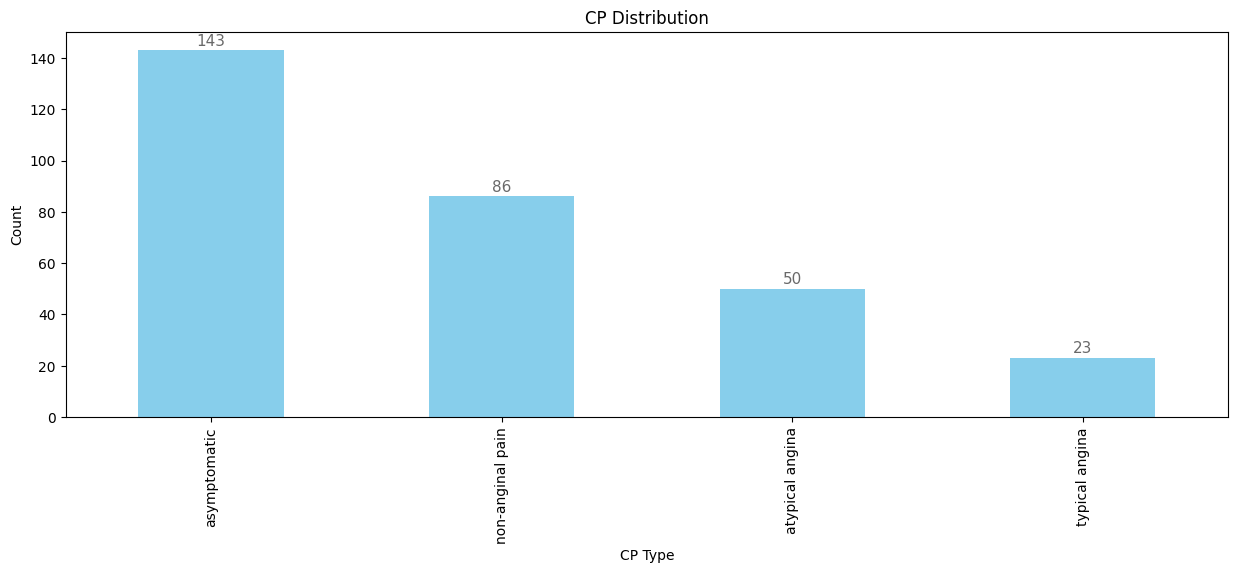

In [ ]:
#chest pain type(CP) dist. bar chart
plt.figure(figsize=(15,5))
df['cp'] = df['cp'].replace({
    0:'asymptomatic',
    1: 'atypical angina',
    2:'non-anginal pain',
    3:'typical angina',
    })

cp_counts = df['cp'].value_counts()
ax = cp_counts.plot(
    kind='bar',
    color='skyblue',
)

# Adding text labels above the bars
for idx, i in enumerate(ax.patches):
  ax.text(
      i.get_x()+i.get_width() /2.,
      i.get_height()+ 0.8,
      str(i.get_height()),
      fontsize=11,
      color= 'dimgray',
      ha= 'center',
      va= 'bottom'
  )

plt.title("CP Distribution")
plt.xlabel("CP Type")
plt.ylabel("Count")
plt.show()


###Pie Chart

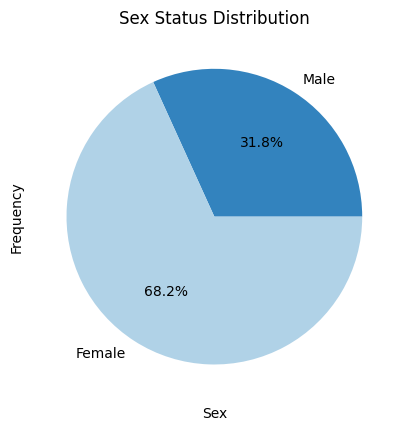

In [ ]:
df['sex'] = df['sex'].replace({1: 'Male', 0: 'Female'})
sex_count = df['sex'].value_counts().sort_index()
cmap = plt.get_cmap('Blues')
portion_list=np.round(df['sex'].value_counts().values /df['sex'].value_counts().sum(),2)
colors = cmap(portion_list)
sex_count.plot(
    kind='pie',
    colors=colors,
    labels=df['sex'].unique(),
    autopct='%1.1f%%',
    )
plt.title("Sex Status Distribution")
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.show()


###Histogram

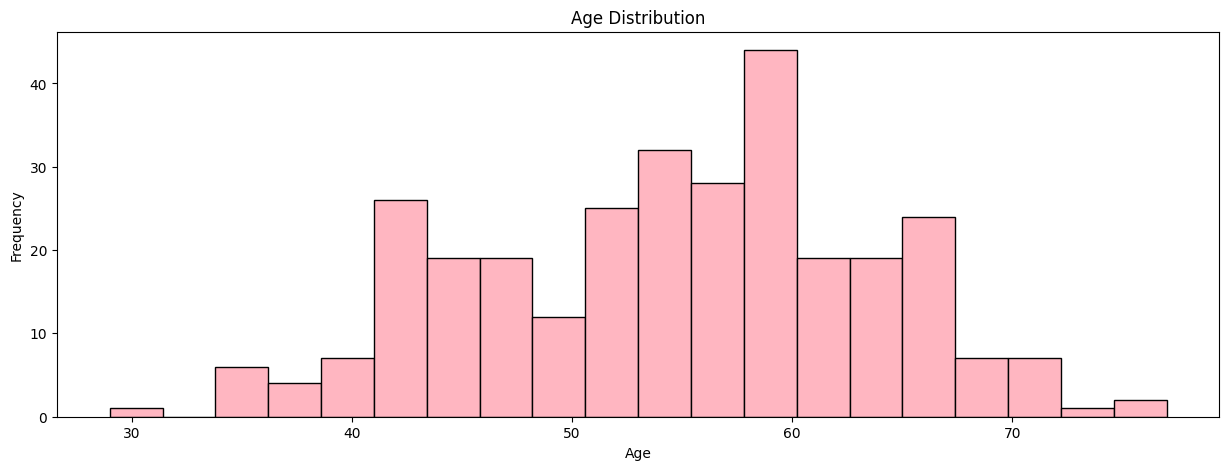

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(
    df['age'],
    bins=20,
    edgecolor = 'black',
    color='lightpink',)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


###3D Ploting

### Scatter Plot

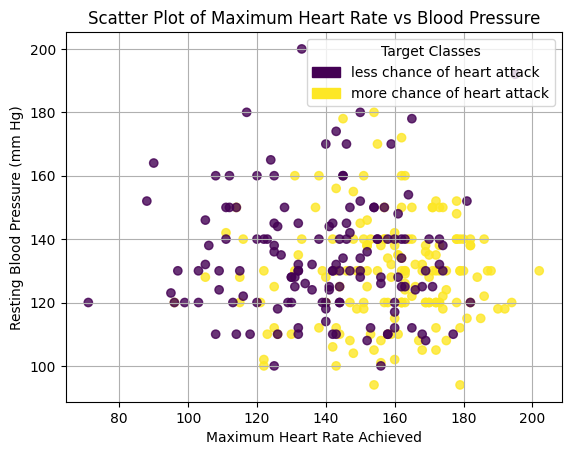

In [ ]:
y = y.replace({
    0: 'less chance of heart attack',
    1: 'more chance of heart attack',
})

# Plot a scatter plot
plt.scatter(
    df['thalachh'],
    df['trtbps'],
    c=y.apply(lambda x: ['less chance of heart attack',
                                    'more chance of heart attack'].index(x)),
                                    cmap='viridis',
                                    alpha=0.8,
)

plt.title('Scatter Plot of Maximum Heart Rate vs Blood Pressure')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Resting Blood Pressure (mm Hg)')

plt.grid(True)

#create custom legend
num_classes = 2  # Number of classes
legend_labels = [mpatches.Patch(color=plt.cm.viridis(i / (num_classes - 1)), label=name)
                 for i, name in enumerate(['less chance of heart attack',
                                           'more chance of heart attack',
                                           ])]

plt.legend(handles=legend_labels, title="Target Classes")
plt.show()


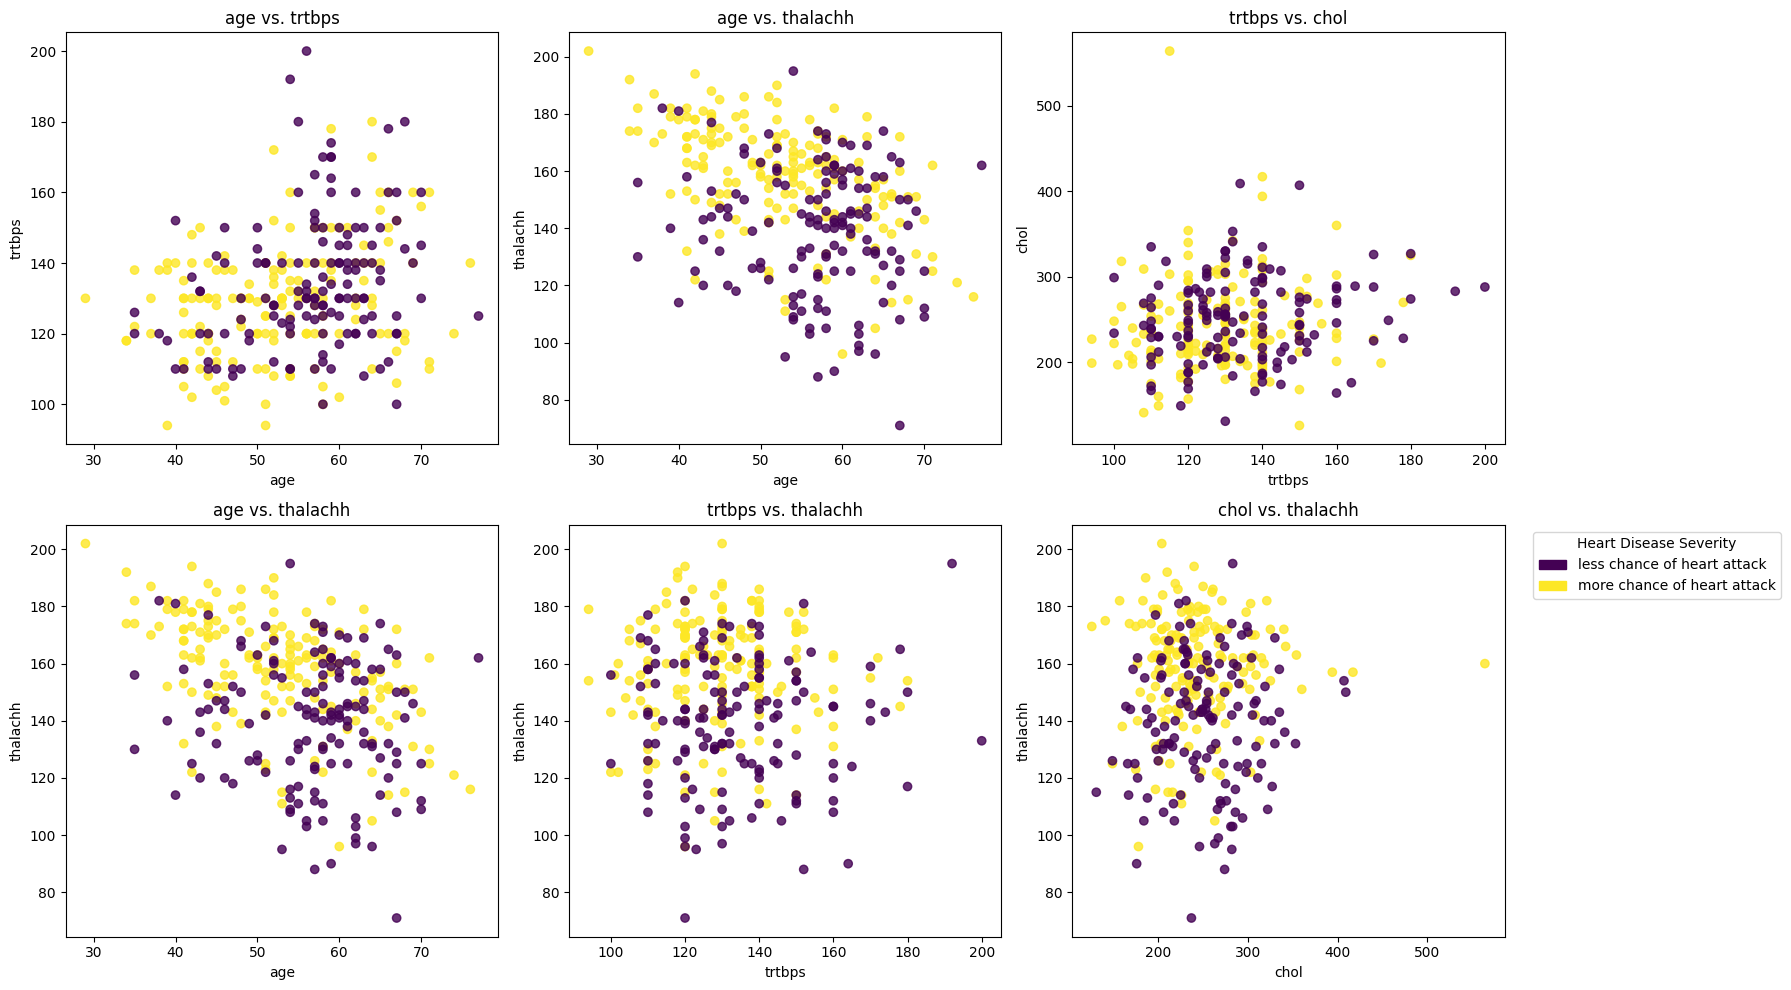

In [ ]:
feature_pairs = [
    ('age', 'trtbps'),
    ('age', 'thalachh'),
    ('trtbps', 'chol'),
    ('age', 'thalachh'),
    ('trtbps', 'thalachh'),
    ('chol', 'thalachh'),
]

# Create a figure with 6 subplots (2 rows by 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the feature pairs and corresponding axes
for i, (x_feature, y_feature) in enumerate(feature_pairs):
    scatter = axes[i].scatter(
        df[x_feature],
        df[y_feature],
        c=df['target'],
        alpha=0.8,
        cmap='viridis',
    )
    axes[i].set_title(f'{x_feature} vs. {y_feature}')
    axes[i].set_xlabel(x_feature)
    axes[i].set_ylabel(y_feature)

# Add a legend to explain the colors
target_classes = 2  # Number of classes in 'target'
legend_labels = [mpatches.Patch(color=plt.cm.viridis(i / (target_classes - 1)),
                                label=label)
                 for i, label in enumerate(['less chance of heart attack', 'more chance of heart attack'])]

plt.legend(handles=legend_labels, title="Heart Disease Severity", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout to prevent overlapping titles/labels
plt.tight_layout()

# Show plot
plt.show()


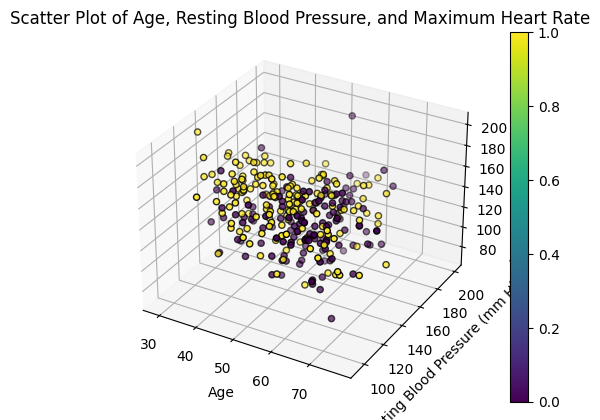

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot
sc = ax.scatter(
    df['age'],
    df['trtbps'],
    df['thalachh'],
    c=y,
    cmap='viridis',
    alpha=0.8,
    marker='o',
    edgecolor = 'k',
)
# Label and title
ax.set_xlabel('Age')
ax.set_ylabel('Resting Blood Pressure (mm Hg)')
ax.set_zlabel('Maximum Heart Rate Achieved')
ax.set_title('Scatter Plot of Age, Resting Blood Pressure, and Maximum Heart Rate')
plt.colorbar(sc)
plt.show()


In [ ]:
# Plotly Express interactive 3D scatter plot

fig = px.scatter_3d(df, x='age',y='trtbps',z='thalachh',
                    color = 'target', title='interactive 3D Scatter plot of Heart Disease Dataset',
                    labels = {'target':'Heart Disease Severity'})
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()